In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-generated-images-vs-real-images/RealArt/RealArt/portrait-smiling-middle-aged-african-260nw-2088822202.jpg
/kaggle/input/ai-generated-images-vs-real-images/RealArt/RealArt/A142xwh4GVL._AC_UF8941000_QL80_.jpg
/kaggle/input/ai-generated-images-vs-real-images/RealArt/RealArt/-man-sits-with-a-woman-on-her-phone-at-a-table-while-looking-at-a-computer_l.jpg
/kaggle/input/ai-generated-images-vs-real-images/RealArt/RealArt/people-strategy_1200x700.jpg
/kaggle/input/ai-generated-images-vs-real-images/RealArt/RealArt/360_F_606797008_rGPPk6bFWDQydnX7g7w1w9dVVZ4mD22J.jpg
/kaggle/input/ai-generated-images-vs-real-images/RealArt/RealArt/71afyFfZx0L._AC_UF8941000_QL80_.jpg
/kaggle/input/ai-generated-images-vs-real-images/RealArt/RealArt/180222162827-the-kiss-story-top-card-image.jpg
/kaggle/input/ai-generated-images-vs-real-images/RealArt/RealArt/COLORFUL-NIGHT.jpg
/kaggle/input/ai-generated-images-vs-real-images/RealArt/RealArt/thumb-duiker-animal.jpg
/kaggle/input/ai-generated-image

In [16]:
!pip install -Uqq fastai

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [19]:
from fastai.vision.all import *

In [7]:
# def get_image_files(path):
#   """
#   This function retrieves image file paths within the nested folder structure.
#   Args:
#       path: Path to the root directory containing the dataset.
#   Returns:
#       A list of tuples, where each tuple contains the image path and its category.
#   """
#   items = []
#   # Loop through each category folder (e.g., AiArtData, RealArt)
#   for category in path.glob("*"):
#     if category.is_dir():
#       # Loop through each image file within the category folder
#       for img_path in category.glob("**/*.jpg"):  # Adjust file extension if needed
#         # Extract category name from the folder name
#         category_name = category.name
#         items.append((str(img_path), category_name))
#   return items

In [8]:
# def parent_label(path):
#   """
#   This function extracts the full path of the parent folder as the label.
#   Args:
#       path: Path to the image file.
#   Returns:
#       The full path of the parent folder.
#   """
#   return str(path.parent)

In [7]:
path = Path('/kaggle/input/ai-generated-images-vs-real-images')
# Define your DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # Image input, multi-class category output
    get_items=get_image_files,           # Function to get image files
    get_y=lambda x: x.parent.parent.name,  # Function to label the data based on the grandparent folder name
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Random split for validation
    item_tfms=RandomResizedCrop(224, min_scale=0.8),  # Resize and crop images
    batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)]  # Data augmentation and normalization
)
dls = dblock.dataloaders(path, bs=16)


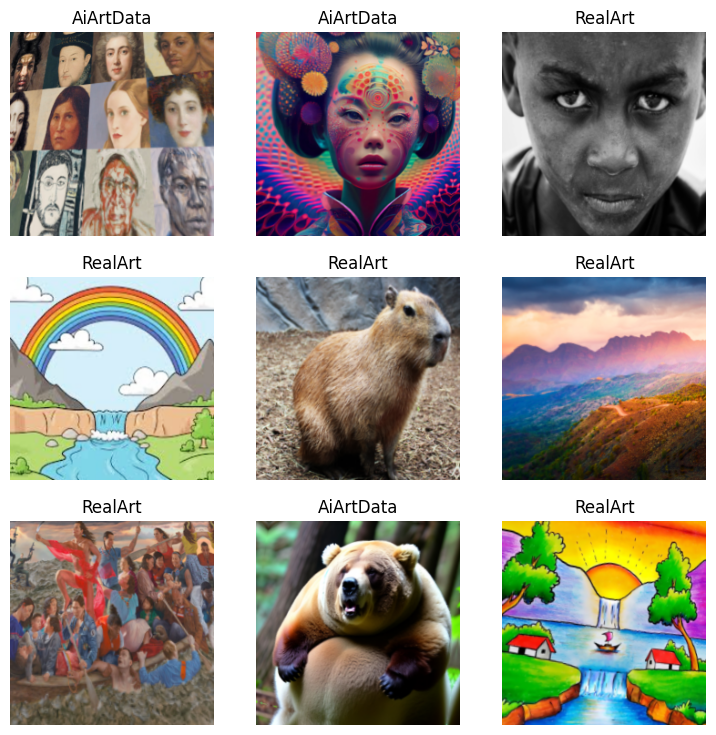

In [11]:
dls.show_batch()


epoch,train_loss,valid_loss,error_rate,time
0,1.115231,0.720362,0.290155,03:17


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


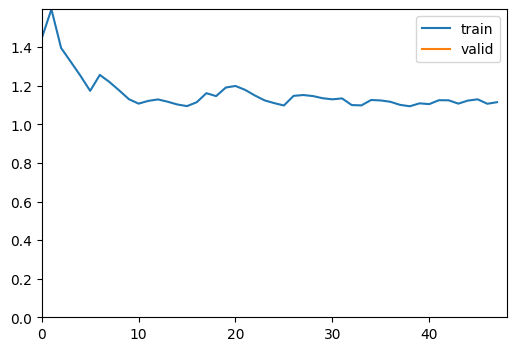

epoch,train_loss,valid_loss,error_rate,time
0,0.781596,0.457109,0.196891,04:38
1,0.632353,0.542941,0.196891,03:19
2,0.514776,0.974014,0.269430,03:19
3,0.481187,0.886074,0.243523,03:20


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


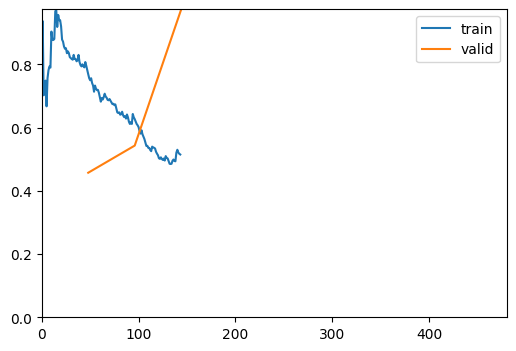

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


No improvement since epoch 0: early stopping


In [12]:
learn = vision_learner(dls, resnet34, metrics=error_rate,cbs=[EarlyStoppingCallback(patience=3), ShowGraphCallback(),SaveModelCallback(every_epoch=True,fname='resnet34_model')])
learn.fine_tune(10)     

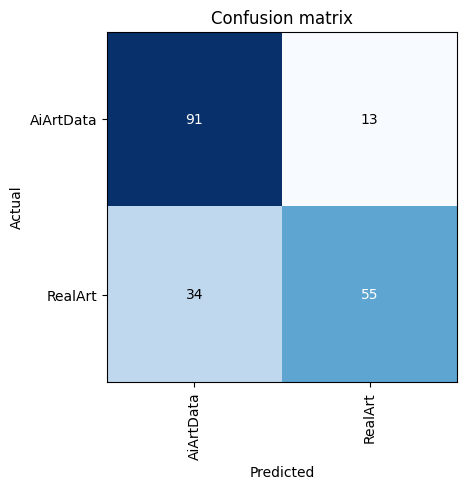

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

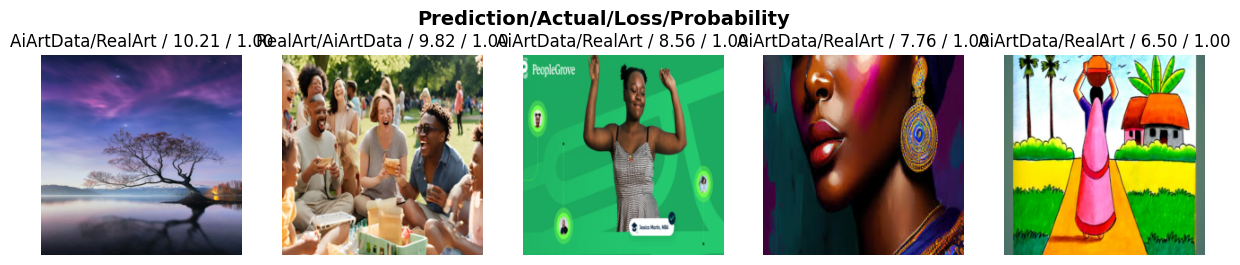

In [14]:
interp.plot_top_losses(5, nrows=1)

In [23]:
from fastai.vision.widgets import *

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


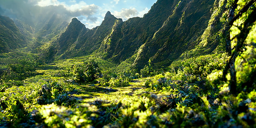

In [24]:


cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
# Get the dataset
train_ds = dls.train_ds
valid_ds = dls.valid_ds

# Count the number of images in each category
train_counts = train_ds.categorize()
valid_counts = valid_ds.categorize()

print("Training set:")
for cat, count in zip(train_counts.vocab, train_counts.count): 
    print(f"{cat}: {count} images")

print("\nValidation set:")
for cat, count in zip(valid_counts.vocab, valid_counts.count): 
    print(f"{cat}: {count} images")
